In [1]:
# sys.path.insert(0, "./docs/transformers/transformers/src")


from datasets import concatenate_datasets
from transformers import Blip2Processor

from lib.daquar.daquar_classification import DaquarClassification
from lib.daquar.daquar_generation import DaquarGeneration
from lib.types import HFRepos, Suffix, VQAParameters
from lib.visualization import (
    calculate_label_frequency,
    create_label_frequency_boxplot,
    display_sample_images,
)

%load_ext autoreload
%autoreload 2

# Load dependencies
processor = Blip2Processor.from_pretrained(HFRepos.BLIP2_OPT)

DIR = "analysis/daquar/"

/home/atomwalk12/anaconda3/envs/dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DAQUAM dataset
## Base Dataset
### Visualization

INFO:lib.dataset_base:Saving dataset to /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/generation/all.pkl
INFO:lib.dataset_base:Saved dataset configuration to /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/generation/all.pkl


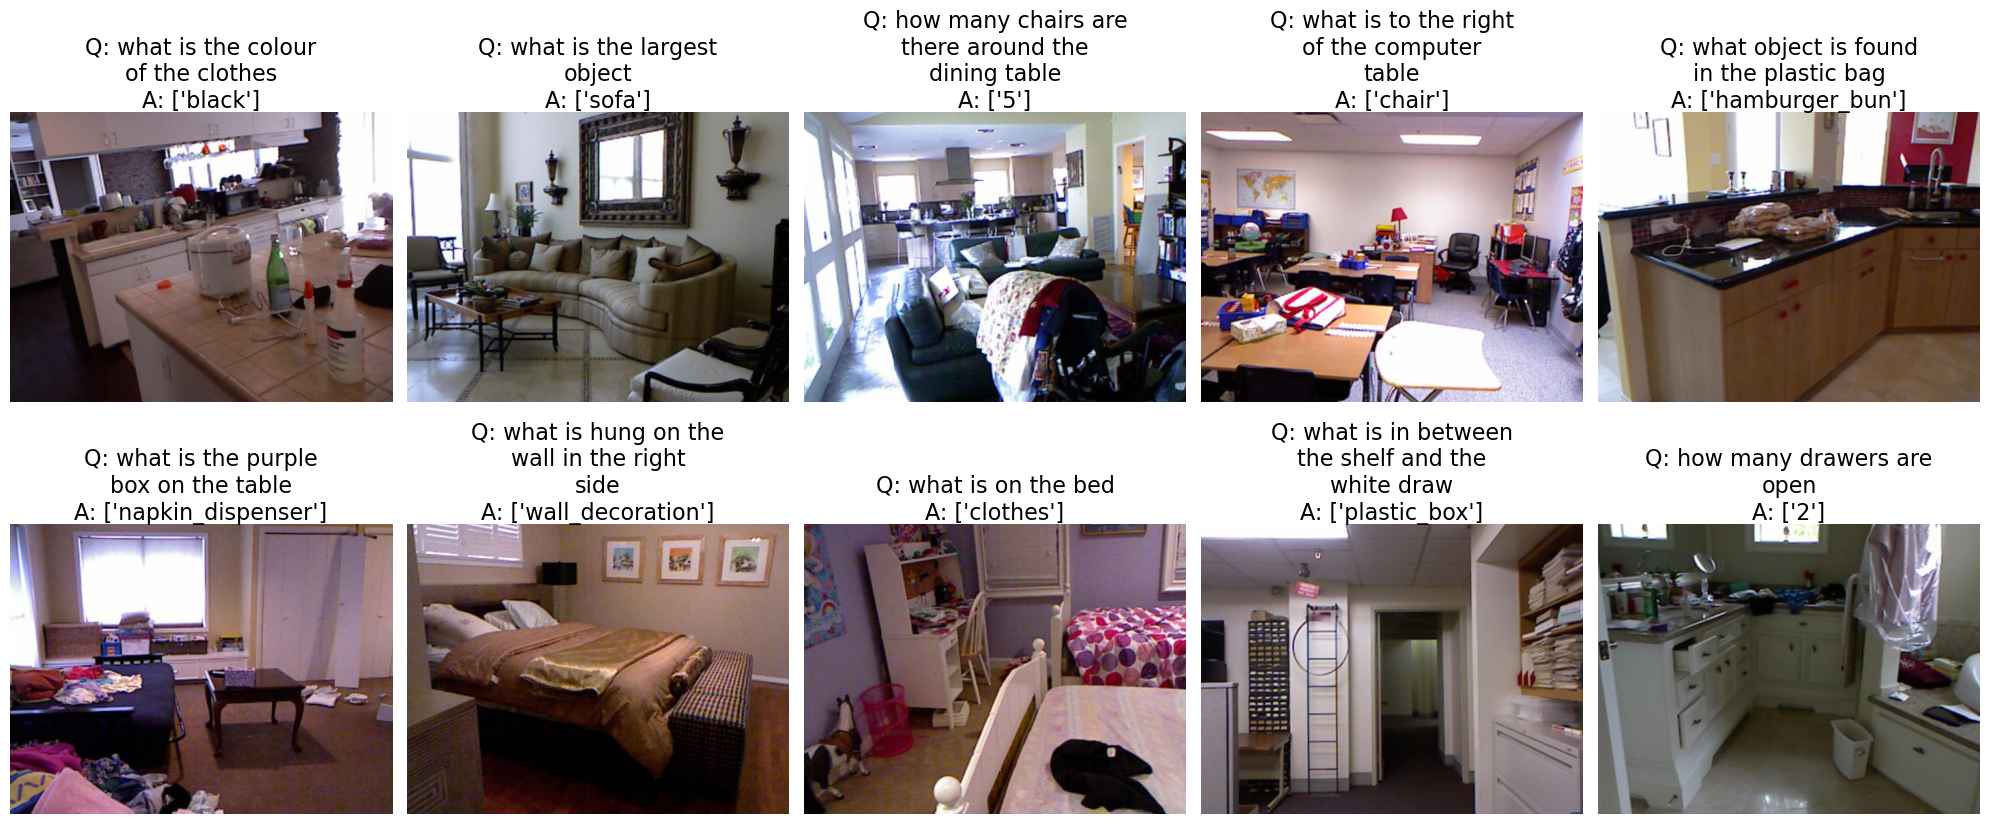

Sample images saved as analysis/daquar//0.daquar_sample_images.pdf


In [2]:
args = VQAParameters(Suffix.All, recompute=True)  # using combined dataset
args.processor = processor
dataset = DaquarGeneration(args)
display_sample_images(
    dataset.raw_dataset, "DAQUAR", f"{DIR}/0.daquar_sample_images.pdf", 10, 16
)

### 1. Label Frequency Bar Chart

In [3]:
calculate_label_frequency(
    dataset,
    None,
    None,
    path=f"{DIR}/1.daquar_bar_base",
    title="DAQUAR Base Dataset Bar Chart",
    multilabel=True,
)

### 2. Label Frequency Boxplot

In [4]:
create_label_frequency_boxplot(
    dataset,
    path=f"{DIR}/1.daquar_boxplot_base",
    multilabel=True,
    title="DAQUAR Base Dataset Boxplot",
)

Q1: 2.0
Q2: 4.0
Q3: 13.75
IQR: 11.75
Lower Whisker: -15.625
Upper Whisker: 31.375
Number of unique labels: 582
Mean frequency: 24.62
Median frequency: 4.00
Number of outliers: 92
Total number of items: 12468


## Processed Dataset

### 3. Label Frequency Bar Chart

In [5]:
args = VQAParameters(
    Suffix.Train, use_proportional_split=True
)  # using combined dataset
args.processor = processor
train_dataset = DaquarClassification(args)

args = VQAParameters(Suffix.Val, use_proportional_split=True)  # using combined dataset
args.processor = processor
val_dataset = DaquarClassification(args)
calculate_label_frequency(
    train_dataset,
    val_dataset,
    None,
    f"{DIR}/3.daquar_boxplot_processed",
    multilabel=True,
    title="DAQUAR Processed Dataset Bar Chart",
)

INFO:lib.dataset_base:Loaded 10976 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/train.pkl
INFO:lib.dataset_base:Loaded 2746 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/val.pkl


### 4. Label Frequency Boxplot

In [6]:
dataset = concatenate_datasets([train_dataset.raw_dataset, val_dataset.raw_dataset])
create_label_frequency_boxplot(
    dataset,
    path=f"{DIR}/4.daquar_boxplot_processed",
    title="DAQUAR Processed Dataset Boxplot",
)

Q1: 654.5
Q2: 757.5
Q3: 839.25
IQR: 184.75
Lower Whisker: 377.375
Upper Whisker: 1116.375
Number of unique labels: 18
Mean frequency: 762.33
Median frequency: 757.50
Number of outliers: 0
Total number of items: 13722
